In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import prince
import pickle

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv("historical&twitter-featured.csv")
data = data.drop('Unnamed: 0', axis=1)
data.head()

,ID,Venue,T1_Mat,T1_AvgRunsScored,T1_AvgRunsConceded,T1_AvgWktsTaken,T1_AvgWktsLost,T1_AvgBound,T1_W/L,T2_Mat,...,T2_AvgWktsLost,T2_AvgBound,T2_W/L,T1_TwitterVol,T2_TwitterVol,T1_FansSent,T2_FansSent,T1_FansPred,T2_FansPred,Winner
0,1,Africa,34,7.10,7.27,0.33,0.32,0.85,1.833,22,...,0.32,0.95,1.000,0.571,0.429,0.571,0.381,0.000,0.000,0
1,2,Oceania,36,8.01,7.38,0.35,0.33,0.98,1.400,30,...,0.32,0.93,1.142,0.838,0.162,0.649,0.162,0.000,0.000,0
2,3,Oceania,37,8.00,7.39,0.35,0.33,0.98,1.312,31,...,0.33,0.93,1.214,0.357,0.643,0.299,0.535,0.333,0.667,1
3,4,America,38,7.14,7.18,0.33,0.34,0.84,1.235,24,...,0.36,0.89,0.714,0.464,0.536,0.464,0.464,0.000,0.000,0
4,5,America,23,7.71,7.94,0.28,0.32,0.96,1.090,25,...,0.36,0.89,0.785,0.696,0.304,0.565,0.283,0.000,0.000,1


In [3]:
data.shape

(519, 23)

In [3]:
# train test split
train, test= train_test_split(data, test_size = 0.2, random_state = 100)

In [4]:
train.shape, test.shape

((415, 23), (104, 23))

In [5]:
train.columns

Index(['ID', 'Venue', 'T1_Mat', 'T1_AvgRunsScored', 'T1_AvgRunsConceded',
       'T1_AvgWktsTaken', 'T1_AvgWktsLost', 'T1_AvgBound', 'T1_W/L', 'T2_Mat',
       'T2_AvgRunsScored', 'T2_AvgRunsConceded', 'T2_AvgWktsTaken',
       'T2_AvgWktsLost', 'T2_AvgBound', 'T2_W/L', 'T1_TwitterVol',
       'T2_TwitterVol', 'T1_FansSent', 'T2_FansSent', 'T1_FansPred',
       'T2_FansPred', 'Winner'],
      dtype='object')

In [6]:
train.dtypes

ID                      int64
Venue                  object
T1_Mat                  int64
T1_AvgRunsScored      float64
T1_AvgRunsConceded    float64
T1_AvgWktsTaken       float64
T1_AvgWktsLost        float64
T1_AvgBound           float64
T1_W/L                float64
T2_Mat                  int64
T2_AvgRunsScored      float64
T2_AvgRunsConceded    float64
T2_AvgWktsTaken       float64
T2_AvgWktsLost        float64
T2_AvgBound           float64
T2_W/L                float64
T1_TwitterVol         float64
T2_TwitterVol         float64
T1_FansSent           float64
T2_FansSent           float64
T1_FansPred           float64
T2_FansPred           float64
Winner                  int64
dtype: object

In [7]:
num = train.select_dtypes(include='number')
num.columns

Index(['ID', 'T1_Mat', 'T1_AvgRunsScored', 'T1_AvgRunsConceded',
       'T1_AvgWktsTaken', 'T1_AvgWktsLost', 'T1_AvgBound', 'T1_W/L', 'T2_Mat',
       'T2_AvgRunsScored', 'T2_AvgRunsConceded', 'T2_AvgWktsTaken',
       'T2_AvgWktsLost', 'T2_AvgBound', 'T2_W/L', 'T1_TwitterVol',
       'T2_TwitterVol', 'T1_FansSent', 'T2_FansSent', 'T1_FansPred',
       'T2_FansPred', 'Winner'],
      dtype='object')

## Model training

In [8]:
xtrain = train.drop(['Winner', 'ID'],axis=1) 
ytrain = train['Winner']
 
xtest = test.drop(['Winner', 'ID' ],axis=1)  
ytest = test['Winner']

xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((415, 21), (104, 21), (415,), (104,))

In [9]:
# Converting categorical features using OneHotEncoding method
encoded_xtrain = pd.get_dummies(data= xtrain, columns=[ 'Venue'])
encoded_xtest = pd.get_dummies(data= xtest, columns=['Venue' ])

encoded_xtrain.shape, encoded_xtest.shape

((415, 25), (104, 25))

In [10]:
st = StandardScaler()
xtrain  = st.fit_transform( encoded_xtrain)
xtest = st.fit_transform( encoded_xtest)

In [11]:
sm = SMOTE(random_state=42)
xtrain_sm, ytrain_sm = sm.fit_resample(  xtrain,ytrain) 
 
xtrain_sm.shape, ytrain_sm.shape 

((486, 25), (486,))

## Logistic regression - with hyperparameter tuning

### Lasso penalty

In [189]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [190]:
logModel  = LogisticRegression(random_state=42)
param_grid = [    
    {'solver' : [ 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cholesky'],
    'penalty' : [   'l1'  ], #'None', 'l1', 'l2', 'elasticnet'
    'C' :  [10 ],#1
    'max_iter': [2000]
    }
]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
log_grid = GridSearchCV(logModel, param_grid = param_grid , verbose=True, n_jobs=-1, cv=cv , scoring='f1')
log_clf_hyp = log_grid.fit(xtrain_sm,ytrain_sm)

Fitting 30 folds for each of 6 candidates, totalling 180 fits


In [191]:
log_clf_hyp.best_estimator_

LogisticRegression(C=10, max_iter=2000, penalty='l1', random_state=42,
                   solver='liblinear')

In [192]:
# Predict the train data
y_predicted = log_clf_hyp.predict(xtrain_sm)

print('\nclassification report - logistice (l1) - train')
print(classification_report(ytrain_sm, y_predicted)) # generate the precision, recall, f-1 score, num
print('LogReg: ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report - logistice (l1) - train
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       243
           1       0.71      0.72      0.72       243

    accuracy                           0.71       486
   macro avg       0.71      0.71      0.71       486
weighted avg       0.71      0.71      0.71       486

LogReg: ROC AUC =  71.2 %
LogReg: Precision =  70.7 %
LogReg: Recall =  72.4 %
LogReg: Accuracy =  71.2 %
LogReg: F1-Score =  71.5 %


array([[170,  73],
       [ 67, 176]], dtype=int64)

In [193]:
# Predict the test data
y_predicted = log_clf_hyp.predict( xtest)

print('\nclassification report - logistic(l2)+SMOTE - test ')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('LogReg: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report - logistic(l2)+SMOTE - test 
              precision    recall  f1-score   support

           0       0.67      0.65      0.66        49
           1       0.70      0.71      0.70        55

    accuracy                           0.68       104
   macro avg       0.68      0.68      0.68       104
weighted avg       0.68      0.68      0.68       104

LogReg: ROC AUC =  68.1 %
LogReg: Precision =  69.6 %
LogReg: Recall =  70.9 %
LogReg: Accuracy =  68.3 %
LogReg: F1-Score =  70.3 %


array([[32, 17],
       [16, 39]], dtype=int64)

In [100]:
# filename = 'LR-Lasso+SMOTE.pkl'
# pickle.dump(log_clf_hyp, open(filename, 'wb'))

### Ridge penalty

In [194]:
logModel  = LogisticRegression(random_state=42)
param_grid = [    
    {'solver' : [ 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cholesky'],
    'penalty' : [   'l2'  ], #'None', 'l1', 'l2', 'elasticnet'
    'C' :  [  1e-2, 1e-1, 1 ],
    'max_iter': [2000]
    }
]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
log_grid = GridSearchCV(logModel, param_grid = param_grid , verbose=True, n_jobs=-1, cv=cv , scoring='f1')
log_clf_hyp = log_grid.fit(xtrain_sm,ytrain_sm)

Fitting 30 folds for each of 18 candidates, totalling 540 fits


In [195]:
log_clf_hyp.best_estimator_

LogisticRegression(C=1, max_iter=2000, random_state=42, solver='newton-cg')

In [196]:
# Predict the train data
y_predicted = log_clf_hyp.predict(xtrain_sm)

print('\nclassification report-logistic(l2)+SMOTE-train')
print(classification_report(ytrain_sm, y_predicted)) # generate the precision, recall, f-1 score, num
print('LogReg: ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report-logistic(l2)+SMOTE-train
              precision    recall  f1-score   support

           0       0.70      0.69      0.69       243
           1       0.69      0.70      0.70       243

    accuracy                           0.70       486
   macro avg       0.70      0.70      0.70       486
weighted avg       0.70      0.70      0.70       486

LogReg: ROC AUC =  69.5 %
LogReg: Precision =  69.2 %
LogReg: Recall =  70.4 %
LogReg: Accuracy =  69.5 %
LogReg: F1-Score =  69.8 %


array([[167,  76],
       [ 72, 171]], dtype=int64)

In [197]:
# Predict the test data
y_predicted = log_clf_hyp.predict( xtest)

print('\nclassification report-logistic(l2)+SMOTE-test')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('LogReg: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report-logistic(l2)+SMOTE-test
              precision    recall  f1-score   support

           0       0.65      0.61      0.63        49
           1       0.67      0.71      0.69        55

    accuracy                           0.66       104
   macro avg       0.66      0.66      0.66       104
weighted avg       0.66      0.66      0.66       104

LogReg: ROC AUC =  66.1 %
LogReg: Precision =  67.2 %
LogReg: Recall =  70.9 %
LogReg: Accuracy =  66.3 %
LogReg: F1-Score =  69.0 %


array([[30, 19],
       [16, 39]], dtype=int64)

In [34]:
# filename = 'LR-Ridge+SMOTE.pkl'
# pickle.dump(log_clf_hyp, open(filename, 'wb'))

### elasticnet

In [62]:
logModel  = LogisticRegression(random_state=42)
param_grid = [    
    {'solver' : [ 'saga'],
    'penalty' : [   'elasticnet'  ], #'None', 'l1', 'l2', 'elasticnet'
    'C' :  [10],
    'max_iter': [2000],
    'l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    }
]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
log_grid = GridSearchCV(logModel, param_grid = param_grid , verbose=True, n_jobs=-1, cv=cv , scoring='f1')
log_clf_hyp = log_grid.fit(xtrain_sm,ytrain_sm)

Fitting 30 folds for each of 9 candidates, totalling 270 fits


In [63]:
log_clf_hyp.best_estimator_

LogisticRegression(C=10, l1_ratio=0.8, max_iter=2000, penalty='elasticnet',
                   random_state=42, solver='saga')

In [64]:
# Predict the train data
y_predicted = log_clf_hyp.predict(xtrain_sm)

print('\nclassification report-logistic(enet)+SMOTE-train')
print(classification_report(ytrain_sm, y_predicted)) # generate the precision, recall, f-1 score, num
print('LogReg: ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report-logistic(enet)+SMOTE-train
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       243
           1       0.71      0.72      0.72       243

    accuracy                           0.71       486
   macro avg       0.71      0.71      0.71       486
weighted avg       0.71      0.71      0.71       486

LogReg: ROC AUC =  71.2 %
LogReg: Precision =  70.7 %
LogReg: Recall =  72.4 %
LogReg: Accuracy =  71.2 %
LogReg: F1-Score =  71.5 %


array([[170,  73],
       [ 67, 176]], dtype=int64)

In [65]:
# Predict the test data
y_predicted = log_clf_hyp.predict( xtest)

print('\nclassification report-logistic(enet)+SMOTE-test')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('LogReg: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report-logistic(enet)+SMOTE-test
              precision    recall  f1-score   support

           0       0.67      0.65      0.66        49
           1       0.70      0.71      0.70        55

    accuracy                           0.68       104
   macro avg       0.68      0.68      0.68       104
weighted avg       0.68      0.68      0.68       104

LogReg: ROC AUC =  68.1 %
LogReg: Precision =  69.6 %
LogReg: Recall =  70.9 %
LogReg: Accuracy =  68.3 %
LogReg: F1-Score =  70.3 %


array([[32, 17],
       [16, 39]], dtype=int64)

In [40]:
# filename = 'LR-Enet+SMOTE.pkl'
# pickle.dump(log_clf_hyp, open(filename, 'wb'))

## SVM with hyperparameter tuning

### SVM - poly

In [14]:
from sklearn.svm import SVC

In [766]:
model = SVC(random_state=42)
parameters = [
              {'C': [ 1e-2 ], 'kernel': ['poly'], 'coef0': [1], 'degree':[3, 4]}]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'f1',
                           cv = cv,
                           n_jobs = -1)
grid_search = grid_search.fit(xtrain_sm, ytrain_sm)
# {'C': [10, 1, 1e-1], 'kernel': ['linear']},
# degree=3, coef0=1, C=5)

In [767]:
grid_search.best_estimator_

SVC(C=0.01, coef0=1, kernel='poly', random_state=42)

In [768]:
grid_search.best_params_, grid_search.best_score_

({'C': 0.01, 'coef0': 1, 'degree': 3, 'kernel': 'poly'}, 0.6286729377700891)

In [769]:
# Predict the train data
y_predicted = grid_search.predict(xtrain_sm)

print('\nclassification report- SVM+ SMOTE -Train')
print('\n\n')
print(classification_report(ytrain_sm, y_predicted)) 
print(' ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report- SVM+ SMOTE -Train



              precision    recall  f1-score   support

           0       0.67      0.65      0.66       243
           1       0.66      0.69      0.67       243

    accuracy                           0.67       486
   macro avg       0.67      0.67      0.67       486
weighted avg       0.67      0.67      0.67       486

 ROC AUC =  66.7 %
 Precision =  66.0 %
 Recall =  68.7 %
 Accuracy =  66.7 %
 F1-Score =  67.3 %


array([[157,  86],
       [ 76, 167]], dtype=int64)

In [770]:
# Predict the test data
y_predicted = grid_search.predict(xtest)

print('\nclassification report- SVM+ SMOTE -Test')
print('\n\n')
print(classification_report(ytest, y_predicted))  
print(' ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report- SVM+ SMOTE -Test



              precision    recall  f1-score   support

           0       0.63      0.67      0.65        49
           1       0.69      0.65      0.67        55

    accuracy                           0.66       104
   macro avg       0.66      0.66      0.66       104
weighted avg       0.67      0.66      0.66       104

 ROC AUC =  66.4 %
 Precision =  69.2 %
 Recall =  65.5 %
 Accuracy =  66.3 %
 F1-Score =  67.3 %


array([[33, 16],
       [19, 36]], dtype=int64)

### SVM-rbf

In [53]:
model = SVC(random_state=42)
parameters = [
              {'C': [ 1e5 ], 'kernel': ['rbf'], 'gamma': [1e-5], 'degree':[3]}]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'f1',
                           cv = cv,
                           n_jobs = -1)
grid_search = grid_search.fit(xtrain_sm, ytrain_sm)
# # {'C': [10, 1, 1e-1], 'kernel': ['linear']},

In [54]:
grid_search.best_params_, grid_search.best_score_

({'C': 100000.0, 'degree': 3, 'gamma': 1e-05, 'kernel': 'rbf'},
 0.6614121675233177)

In [55]:
# Predict the train data
y_predicted = grid_search.predict(xtrain_sm)

print('\nclassification report- SVM+ SMOTE -Train')
print('\n\n')
print(classification_report(ytrain_sm, y_predicted)) 
print(' ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report- SVM+ SMOTE -Train



              precision    recall  f1-score   support

           0       0.71      0.73      0.72       243
           1       0.72      0.70      0.71       243

    accuracy                           0.72       486
   macro avg       0.72      0.72      0.72       486
weighted avg       0.72      0.72      0.72       486

 ROC AUC =  71.6 %
 Precision =  72.3 %
 Recall =  70.0 %
 Accuracy =  71.6 %
 F1-Score =  71.1 %


array([[178,  65],
       [ 73, 170]], dtype=int64)

In [56]:
# Predict the test data
y_predicted = grid_search.predict(xtest)

print('\nclassification report- SVM+ SMOTE -Test')
print('\n\n')
print(classification_report(ytest, y_predicted))  
print(' ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report- SVM+ SMOTE -Test



              precision    recall  f1-score   support

           0       0.67      0.65      0.66        49
           1       0.70      0.71      0.70        55

    accuracy                           0.68       104
   macro avg       0.68      0.68      0.68       104
weighted avg       0.68      0.68      0.68       104

 ROC AUC =  68.1 %
 Precision =  69.6 %
 Recall =  70.9 %
 Accuracy =  68.3 %
 F1-Score =  70.3 %


array([[32, 17],
       [16, 39]], dtype=int64)

### SVM-linear

In [15]:
# define model
model = SVC(random_state=42)

# define grid search
param_grid = [    
{'kernel' : ['poly', 'rbf', 'sigmoid', 'linear' ], #linear
     'gamma' :['scale', 'auto' ], #'scale'
    'C': [10] #10
 
    }
]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, verbose=True, n_jobs=-1, cv=cv , scoring = 'f1', error_score=0)
grid_result = grid_search.fit(xtrain_sm, ytrain_sm)

Fitting 30 folds for each of 8 candidates, totalling 240 fits


In [16]:
grid_search.best_params_, grid_search.best_score_

({'C': 10, 'gamma': 'scale', 'kernel': 'linear'}, 0.6733645763680387)

In [17]:
# Predict the train data
y_predicted = grid_search.predict(xtrain_sm)

print('\nclassification report- SVM+ SMOTE -Train')
print('\n\n')
print(classification_report(ytrain_sm, y_predicted)) 
print(' ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report- SVM+ SMOTE -Train



              precision    recall  f1-score   support

           0       0.72      0.72      0.72       243
           1       0.72      0.71      0.72       243

    accuracy                           0.72       486
   macro avg       0.72      0.72      0.72       486
weighted avg       0.72      0.72      0.72       486

 ROC AUC =  71.8 %
 Precision =  72.1 %
 Recall =  71.2 %
 Accuracy =  71.8 %
 F1-Score =  71.6 %


array([[176,  67],
       [ 70, 173]], dtype=int64)

In [18]:
# Predict the test data
y_predicted = grid_search.predict(xtest)

print('\nclassification report- SVM+ SMOTE -Test')
print('\n\n')
print(classification_report(ytest, y_predicted))  
print(' ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report- SVM+ SMOTE -Test



              precision    recall  f1-score   support

           0       0.68      0.65      0.67        49
           1       0.70      0.73      0.71        55

    accuracy                           0.69       104
   macro avg       0.69      0.69      0.69       104
weighted avg       0.69      0.69      0.69       104

 ROC AUC =  69.0 %
 Precision =  70.2 %
 Recall =  72.7 %
 Accuracy =  69.2 %
 F1-Score =  71.4 %


array([[32, 17],
       [15, 40]], dtype=int64)

In [19]:
importance = grid_search.best_estimator_.coef_
importance

array([[ 0.26250062, -0.7737131 , -0.39934115,  0.06063559, -0.79469857,
         0.85084078, -0.96602718,  0.05785168, -0.212831  ,  0.29161686,
        -0.15506754,  0.17809691, -0.46944365,  0.64142571, -1.37783891,
         1.2886022 ,  1.38939729, -2.03007686,  0.1881013 , -0.02944931,
        -0.04447755, -0.03448686, -0.03697907, -0.10854007,  0.18272623]])

In [20]:
importance =  [ 0.26250062, -0.7737131 , -0.39934115,  0.06063559, -0.79469857,
         0.85084078, -0.96602718,  0.05785168, -0.212831  ,  0.29161686,
        -0.15506754,  0.17809691, -0.46944365,  0.64142571, -1.37783891,
         1.2886022 ,  1.38939729, -2.03007686,  0.1881013 , -0.02944931,
        -0.04447755, -0.03448686, -0.03697907, -0.10854007,  0.18272623]

In [21]:
importance_abs = [abs(i) for i in importance]

In [22]:
#Important variables
importances_rf = pd.DataFrame(data = {'Attribute': encoded_xtrain.columns, 'Importance ': importance })
importances_rf

,Attribute,Importance
0,T1_Mat,0.262501
1,T1_AvgRunsScored,-0.773713
2,T1_AvgRunsConceded,-0.399341
3,T1_AvgWktsTaken,0.060636
4,T1_AvgWktsLost,-0.794699
5,T1_AvgBound,0.850841
6,T1_W/L,-0.966027
7,T2_Mat,0.057852
8,T2_AvgRunsScored,-0.212831
9,T2_AvgRunsConceded,0.291617


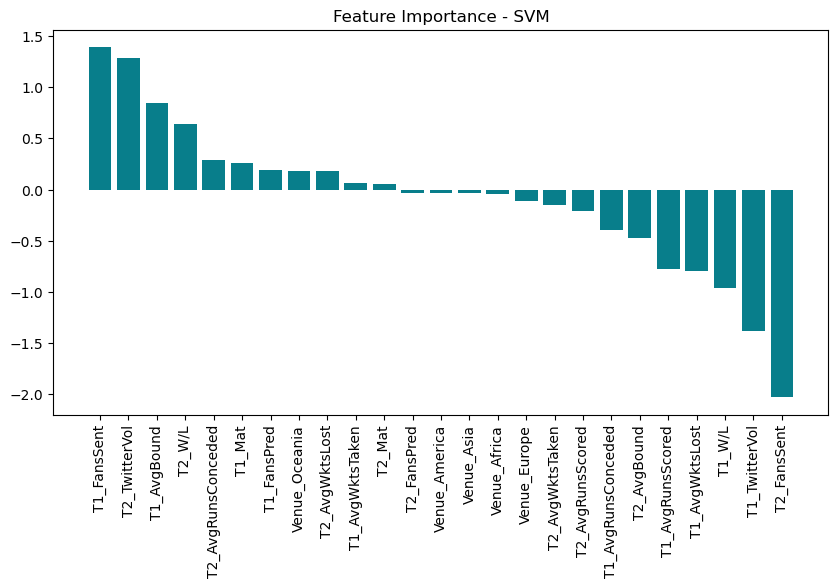

In [23]:
#plot
importances_rf = importances_rf.sort_values(by='Importance ', ascending = False)
plt.figure(figsize=(10,5))
plt.bar(x=importances_rf['Attribute'], height = importances_rf['Importance '], color = '#087E8B')
plt.title('Feature Importance - SVM')
plt.xticks(rotation='vertical')
plt.show()

In [24]:
#Important variables
importances_rf = pd.DataFrame(data = {'Attribute': encoded_xtrain.columns, 'Importance-abs': importance_abs })
importances_rf

,Attribute,Importance-abs
0,T1_Mat,0.262501
1,T1_AvgRunsScored,0.773713
2,T1_AvgRunsConceded,0.399341
3,T1_AvgWktsTaken,0.060636
4,T1_AvgWktsLost,0.794699
5,T1_AvgBound,0.850841
6,T1_W/L,0.966027
7,T2_Mat,0.057852
8,T2_AvgRunsScored,0.212831
9,T2_AvgRunsConceded,0.291617


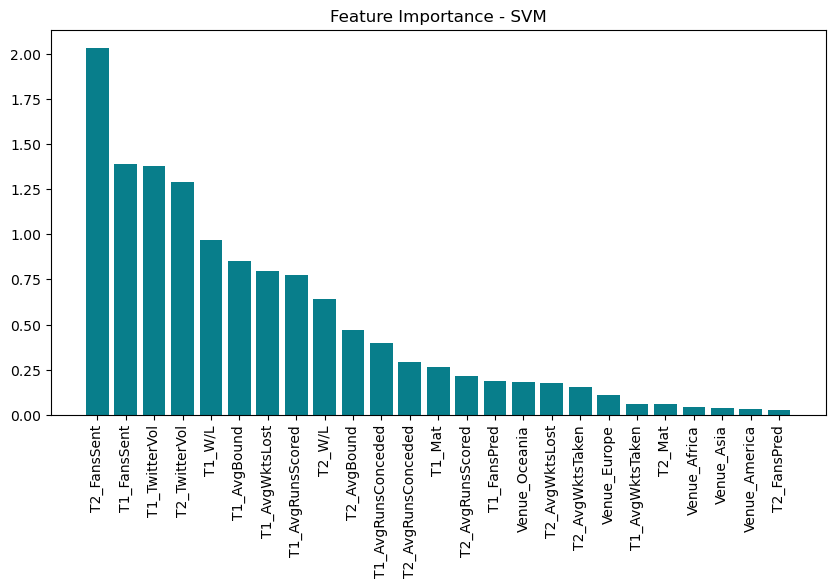

In [25]:
#plot
importances_rf = importances_rf.sort_values(by='Importance-abs', ascending = False)
plt.figure(figsize=(10,5))
plt.bar(x=importances_rf['Attribute'], height = importances_rf['Importance-abs'], color = '#087E8B' )
plt.title('Feature Importance - SVM')
plt.xticks(rotation='vertical')
plt.show()

## SVM - T2_Mat - T2_FansPred

In [29]:
xtrain = train.drop(['Winner', 'ID',  
 'T2_Mat',  'T2_FansPred'  ],axis=1) 
ytrain = train['Winner']
 
xtest = test.drop(['Winner', 'ID',    
 'T2_Mat',  'T2_FansPred'  ],axis=1)  
ytest = test['Winner']

# Converting categorical features using OneHotEncoding method
encoded_xtrain = pd.get_dummies(data= xtrain, columns=[ 'Venue'])
encoded_xtest = pd.get_dummies(data= xtest, columns=['Venue' ])

st = StandardScaler()
xtrain  = st.fit_transform(   encoded_xtrain)
xtest = st.fit_transform(   encoded_xtest)

sm = SMOTE(random_state=42)
xtrain_sm, ytrain_sm = sm.fit_resample(  xtrain,ytrain) 

In [30]:
# define model
model = SVC(random_state=42)

# define grid search
param_grid = [    
{'kernel' : [ 'linear' ], #linear
    'C': [100], #10,
   'probability':[True]
 
 
 
    }
]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, verbose=True, n_jobs=-1, cv=cv , scoring = 'f1', error_score=0)
grid_result = grid_search.fit(xtrain_sm, ytrain_sm)

Fitting 30 folds for each of 1 candidates, totalling 30 fits


In [31]:
grid_search.best_params_, grid_search.best_score_

({'C': 100, 'kernel': 'linear', 'probability': True}, 0.6606894183718719)

In [32]:
# Predict the train data
y_predicted = grid_search.predict(xtrain_sm)

print('\nclassification report- SVM+ SMOTE -Train')
print('\n\n')
print(classification_report(ytrain_sm, y_predicted)) 
print(' ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report- SVM+ SMOTE -Train



              precision    recall  f1-score   support

           0       0.70      0.72      0.71       243
           1       0.71      0.70      0.70       243

    accuracy                           0.71       486
   macro avg       0.71      0.71      0.71       486
weighted avg       0.71      0.71      0.71       486

 ROC AUC =  70.6 %
 Precision =  71.0 %
 Recall =  69.5 %
 Accuracy =  70.6 %
 F1-Score =  70.3 %


array([[174,  69],
       [ 74, 169]], dtype=int64)

In [33]:
# Predict the test data
y_predicted = grid_search.predict(xtest)

print('\nclassification report- SVM+ SMOTE -Test')
print('\n\n')
print(classification_report(ytest, y_predicted))  
print(' ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report- SVM+ SMOTE -Test



              precision    recall  f1-score   support

           0       0.67      0.61      0.64        49
           1       0.68      0.73      0.70        55

    accuracy                           0.67       104
   macro avg       0.67      0.67      0.67       104
weighted avg       0.67      0.67      0.67       104

 ROC AUC =  67.0 %
 Precision =  67.8 %
 Recall =  72.7 %
 Accuracy =  67.3 %
 F1-Score =  70.2 %


array([[30, 19],
       [15, 40]], dtype=int64)

In [34]:
importance = grid_search.best_estimator_.coef_
importance

array([[ 0.28733179, -0.93307326, -0.55315871,  0.03526347, -0.87302217,
         1.10990184, -1.10280703, -0.02103441,  0.17689054, -0.32748365,
         0.1160237 , -0.54576699,  0.59861487, -1.5642085 ,  1.04681054,
         1.29829778, -2.13892711,  0.22480604, -0.04086955, -0.04387937,
        -0.07576191, -0.06569437,  0.20653279]])

In [38]:
importance =  [ 0.28733179, -0.93307326, -0.55315871,  0.03526347, -0.87302217,
         1.10990184, -1.10280703, -0.02103441,  0.17689054, -0.32748365,
         0.1160237 , -0.54576699,  0.59861487, -1.5642085 ,  1.04681054,
         1.29829778, -2.13892711,  0.22480604, -0.04086955, -0.04387937,
        -0.07576191, -0.06569437,  0.20653279]
importance_abs = [abs(i) for i in importance]

In [39]:
#Important variables
importances_rf = pd.DataFrame(data = {'Attribute': encoded_xtrain.columns, 'Importance-abs': importance_abs })
importances_rf

,Attribute,Importance-abs
0,T1_Mat,0.287332
1,T1_AvgRunsScored,0.933073
2,T1_AvgRunsConceded,0.553159
3,T1_AvgWktsTaken,0.035263
4,T1_AvgWktsLost,0.873022
5,T1_AvgBound,1.109902
6,T1_W/L,1.102807
7,T2_AvgRunsScored,0.021034
8,T2_AvgRunsConceded,0.176891
9,T2_AvgWktsTaken,0.327484


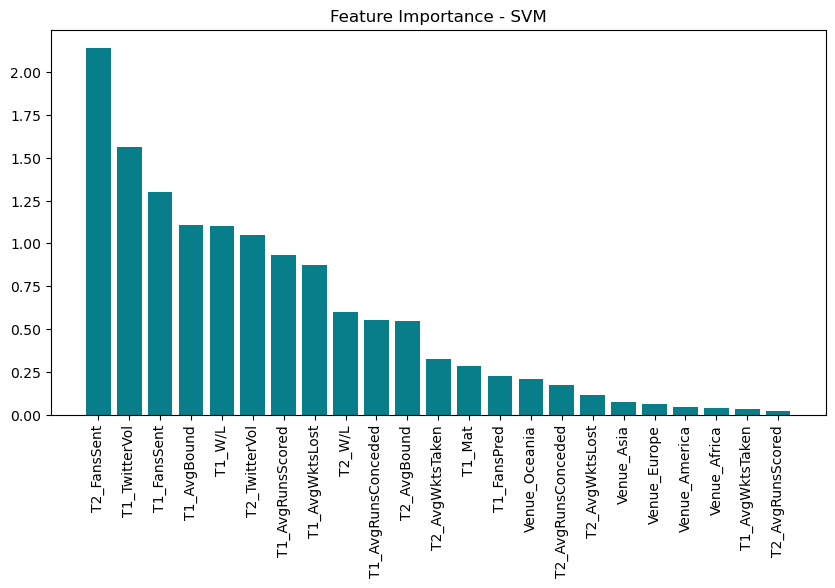

In [40]:
#plot
importances_rf = importances_rf.sort_values(by='Importance-abs', ascending = False)
plt.figure(figsize=(10,5))
plt.bar(x=importances_rf['Attribute'], height = importances_rf['Importance-abs'], color = '#087E8B' )
plt.title('Feature Importance - SVM')
plt.xticks(rotation='vertical')
plt.show()

In [705]:
# filename = 'SVM+SMOTE.pkl'
# pickle.dump(grid_search, open(filename, 'wb'))

## KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier # The k-nearest neighbor classifier
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.pipeline import Pipeline # For setting up pipeline
# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV # For optimization

In [13]:
pipe = Pipeline([
('classifier', KNeighborsClassifier())
])

In [128]:
parameters = { 
 'classifier__n_neighbors': [ 45],
 'classifier__p': [1, 2],
 'classifier__leaf_size':   [1, 5, 10, 15],
 'classifier__weights': ['uniform'  ],
 'classifier__metric' : [ 'manhattan', 'minkowski', 'euclidean']
}

In [129]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(pipe, parameters,verbose=True, n_jobs=-1, cv=cv , scoring = 'f1', error_score=0).fit(xtrain_sm  , ytrain_sm  )

Fitting 30 folds for each of 24 candidates, totalling 720 fits


In [130]:
grid.best_params_, grid.best_score_

({'classifier__leaf_size': 1,
  'classifier__metric': 'manhattan',
  'classifier__n_neighbors': 45,
  'classifier__p': 1,
  'classifier__weights': 'uniform'},
 0.6245363889454479)

In [131]:
y_predicted = grid.predict(xtrain_sm)

print('\nclassification report -  RF+ SMOTE -Train')
print('\n\n')
print(classification_report(ytrain_sm, y_predicted)) # generate the precision, recall, f-1 score, num
print(' ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report -  RF+ SMOTE -Train



              precision    recall  f1-score   support

           0       0.63      0.63      0.63       243
           1       0.63      0.64      0.64       243

    accuracy                           0.63       486
   macro avg       0.63      0.63      0.63       486
weighted avg       0.63      0.63      0.63       486

 ROC AUC =  63.4 %
 Precision =  63.3 %
 Recall =  63.8 %
 Accuracy =  63.4 %
 F1-Score =  63.5 %


array([[153,  90],
       [ 88, 155]], dtype=int64)

In [132]:
# Predict the test data
y_predicted = grid.predict(xtest)

print('\nclassification report- RF+ SMOTE -Test')
print('\n\n')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('Random Forest: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report- RF+ SMOTE -Test



              precision    recall  f1-score   support

           0       0.60      0.69      0.64        49
           1       0.68      0.58      0.63        55

    accuracy                           0.63       104
   macro avg       0.64      0.64      0.63       104
weighted avg       0.64      0.63      0.63       104

Random Forest: ROC AUC =  63.8 %
Random Forest: Precision =  68.1 %
Random Forest: Recall =  58.2 %
Random Forest: Accuracy =  63.5 %
Random Forest: F1-Score =  62.7 %


array([[34, 15],
       [23, 32]], dtype=int64)

## GNB

In [84]:
import random

def set_random_seed(seed=100):
  np.random.seed(seed)
  random.seed(seed)
    
set_random_seed(100)

In [125]:
from sklearn.naive_bayes import GaussianNB

gnb_clf_hyp = GaussianNB(var_smoothing=10e-1 ) 
gnb_clf_hyp.fit(xtrain_sm, ytrain_sm)

GaussianNB(var_smoothing=1.0)

In [126]:
y_predicted = gnb_clf_hyp.predict(xtrain_sm)

print('\nclassification report -  RF+ SMOTE -Train')
print('\n\n')
print(classification_report(ytrain_sm, y_predicted)) # generate the precision, recall, f-1 score, num
print(' ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report -  RF+ SMOTE -Train



              precision    recall  f1-score   support

           0       0.66      0.60      0.63       243
           1       0.63      0.69      0.66       243

    accuracy                           0.64       486
   macro avg       0.65      0.64      0.64       486
weighted avg       0.65      0.64      0.64       486

 ROC AUC =  64.4 %
 Precision =  63.2 %
 Recall =  69.1 %
 Accuracy =  64.4 %
 F1-Score =  66.0 %


array([[145,  98],
       [ 75, 168]], dtype=int64)

In [127]:
# Predict the test data
y_predicted = gnb_clf_hyp.predict(xtest)

print('\nclassification report- RF+ SMOTE -Test')
print('\n\n')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('Random Forest: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report- RF+ SMOTE -Test



              precision    recall  f1-score   support

           0       0.63      0.59      0.61        49
           1       0.66      0.69      0.67        55

    accuracy                           0.64       104
   macro avg       0.64      0.64      0.64       104
weighted avg       0.64      0.64      0.64       104

Random Forest: ROC AUC =  64.1 %
Random Forest: Precision =  65.5 %
Random Forest: Recall =  69.1 %
Random Forest: Accuracy =  64.4 %
Random Forest: F1-Score =  67.3 %


array([[29, 20],
       [17, 38]], dtype=int64)

## Random Forest

## random forest - with hyperparameter tuning

In [13]:
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV  

In [655]:
# define models and parameters
model = RandomForestClassifier(random_state=42)
param_grid = [    
    {'n_estimators' : [2000],
    'criterion': [ 'gini'], #gini
    'max_features':['sqrt'], #0.2
     'min_samples_leaf': [  120  ], #120
     'oob_score':[True],
     'min_samples_split':[6] #6
    }
]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid= param_grid, n_jobs=-1,  cv=cv, scoring='f1',error_score='raise')
grid_result = grid_search.fit(xtrain_sm, ytrain_sm)

In [656]:
grid_search.best_estimator_

RandomForestClassifier(max_features='sqrt', min_samples_leaf=120,
                       min_samples_split=6, n_estimators=2000, oob_score=True,
                       random_state=42)

In [657]:
grid_search.best_params_, grid_search.best_score_

({'criterion': 'gini',
  'max_features': 'sqrt',
  'min_samples_leaf': 120,
  'min_samples_split': 6,
  'n_estimators': 2000,
  'oob_score': True},
 0.6452997193284952)

In [659]:
y_predicted = grid_search.predict(xtrain_sm)

print('\nclassification report -  RF+ SMOTE -Train')
print('\n\n')
print(classification_report(ytrain_sm, y_predicted)) # generate the precision, recall, f-1 score, num
print(' ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report -  RF+ SMOTE -Train



              precision    recall  f1-score   support

           0       0.67      0.63      0.65       243
           1       0.65      0.68      0.67       243

    accuracy                           0.66       486
   macro avg       0.66      0.66      0.66       486
weighted avg       0.66      0.66      0.66       486

 ROC AUC =  65.8 %
 Precision =  65.1 %
 Recall =  68.3 %
 Accuracy =  65.8 %
 F1-Score =  66.7 %


array([[154,  89],
       [ 77, 166]], dtype=int64)

In [660]:
# Predict the test data
y_predicted = grid_search.predict(xtest)

print('\nclassification report- RF+ SMOTE -Test')
print('\n\n')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('Random Forest: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report- RF+ SMOTE -Test



              precision    recall  f1-score   support

           0       0.62      0.67      0.65        49
           1       0.69      0.64      0.66        55

    accuracy                           0.65       104
   macro avg       0.65      0.65      0.65       104
weighted avg       0.66      0.65      0.65       104

Random Forest: ROC AUC =  65.5 %
Random Forest: Precision =  68.6 %
Random Forest: Recall =  63.6 %
Random Forest: Accuracy =  65.4 %
Random Forest: F1-Score =  66.0 %


array([[33, 16],
       [20, 35]], dtype=int64)

In [438]:
# filename = 'RF+SMOTE.pkl'
# pickle.dump(grid_search, open(filename, 'wb'))

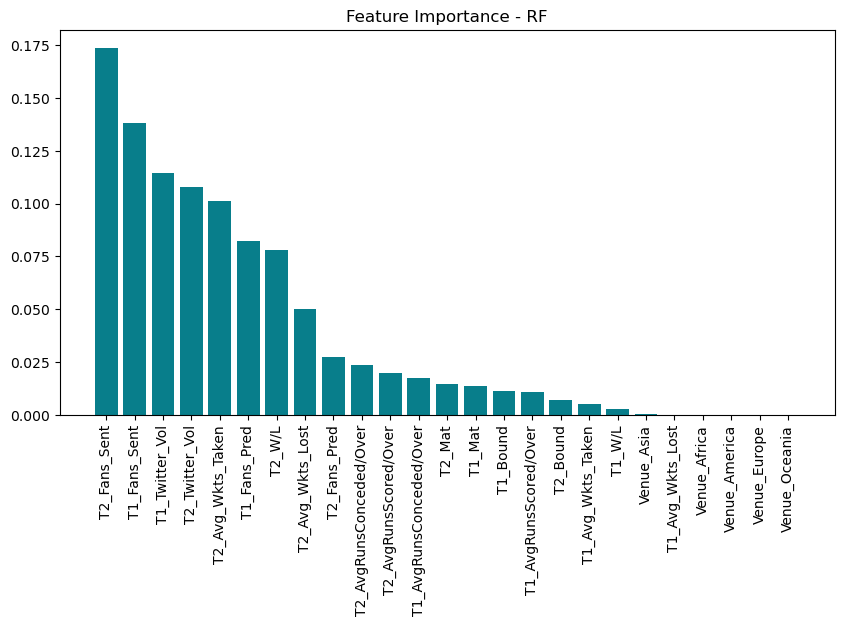

In [661]:
# get importance
importance = grid_search.best_estimator_.feature_importances_
#Important variables
importances_rf = pd.DataFrame(data = {'Attribute': encoded_xtrain.columns, 'Importance': grid_search.best_estimator_.feature_importances_})
importances_rf = importances_rf.sort_values(by='Importance', ascending = False)
#plot
plt.figure(figsize=(10,5))
plt.bar(x=importances_rf['Attribute'], height = importances_rf['Importance'], color = '#087E8B')
plt.title('Feature Importance - RF')
plt.xticks(rotation='vertical')
plt.show()

In [665]:
list(importances_rf['Attribute'])[-10:]

['T1_AvgRunsScored/Over',
 'T2_Bound',
 'T1_Avg_Wkts_Taken',
 'T1_W/L',
 'Venue_Asia',
 'T1_Avg_Wkts_Lost',
 'Venue_Africa',
 'Venue_America',
 'Venue_Europe',
 'Venue_Oceania']

In [ ]:
# Venue, T1_Avg_Wkts_Taken, T1_Avg_Wkts_Lost, T1_W/L, T1_AvgRunsScored/Over, T2_Bound, T_Bound, T2_Mat, T1_Mat 
# T1_AvgRunsConceded/Over

## BOOSTING

## Gradient Boosting With XGBoost

In [383]:
import xgboost as xgb

In [98]:
# {'learning_rate' :[1e-8],# 8
#     'n_estimators':[2000],
#  'max_depth':[ 2 ], #3 #4 #8
#  'min_child_weight':[ 10 ], #10
#  'gamma':[0],
#  'subsample':[    0.2], #0.2
#  'colsample_bytree':[ 0.85 ], #0.85
#  'objective': ['binary:logistic'],
#  'nthread':[4],
#  'scale_pos_weight':[1],
#  'reg_alpha':[1e-5 ]
#     }

In [666]:
model = xgb.XGBClassifier(seed = 42)
param_grid = [    
    {'learning_rate' :[1e-8],# 8 #6
    'n_estimators':[2000],
 'max_depth':[  2 ], # 2#3 #4 #8
 'min_child_weight':[7], #10 #7
 'gamma':[0],
 'subsample':[0.15 ], #0.2 #0.15
 'colsample_bytree':[   0.85 ], #0.85
 'objective': ['binary:logistic'],
 'nthread':[4],
 'scale_pos_weight':[1],
 'reg_alpha':[1e-5 ]
    }
]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid= param_grid,  cv=cv, n_jobs = -1, scoring='f1',error_score='raise', verbose=0 )
grid_result = grid_search.fit(xtrain_sm, ytrain_sm)
#,colsample_bytree':[ 0.1, 0.2 ]

In [667]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.85,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1e-08, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=2, max_leaves=0, min_child_weight=7, missing=nan,
              monotone_constraints='()', n_estimators=2000, n_jobs=4, nthread=4,
              num_parallel_tree=1, predictor='auto', ...)

In [668]:
grid_search.best_params_, grid_search.best_score_

({'colsample_bytree': 0.85,
  'gamma': 0,
  'learning_rate': 1e-08,
  'max_depth': 2,
  'min_child_weight': 7,
  'n_estimators': 2000,
  'nthread': 4,
  'objective': 'binary:logistic',
  'reg_alpha': 1e-05,
  'scale_pos_weight': 1,
  'subsample': 0.15},
 0.6532434381286981)

In [634]:
# {'n_estimators' : [ 2000],
#     'max_depth': [1,2 ],
#     'learning_rate' : [0.0001, 0.001 ],
#      'subsample': [ 0.1, 0.2 ]
#     }

In [669]:
y_predicted = grid_search.predict(xtrain_sm)

print('\nclassification report -  XG+ SMOTE -Train')
print('\n\n')
print(classification_report(ytrain_sm, y_predicted)) # generate the precision, recall, f-1 score, num
print(' ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report -  XG+ SMOTE -Train



              precision    recall  f1-score   support

           0       0.68      0.64      0.66       243
           1       0.66      0.70      0.68       243

    accuracy                           0.67       486
   macro avg       0.67      0.67      0.67       486
weighted avg       0.67      0.67      0.67       486

 ROC AUC =  66.9 %
 Precision =  66.0 %
 Recall =  69.5 %
 Accuracy =  66.9 %
 F1-Score =  67.7 %


array([[156,  87],
       [ 74, 169]], dtype=int64)

In [670]:
# Predict the test data
y_predicted = grid_search.predict( xtest)

print('\nclassification report- RF+ SMOTE -Test')
print('\n\n')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('Random Forest: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report- RF+ SMOTE -Test



              precision    recall  f1-score   support

           0       0.62      0.67      0.65        49
           1       0.69      0.64      0.66        55

    accuracy                           0.65       104
   macro avg       0.65      0.65      0.65       104
weighted avg       0.66      0.65      0.65       104

Random Forest: ROC AUC =  65.5 %
Random Forest: Precision =  68.6 %
Random Forest: Recall =  63.6 %
Random Forest: Accuracy =  65.4 %
Random Forest: F1-Score =  66.0 %


array([[33, 16],
       [20, 35]], dtype=int64)

In [75]:
# filename = 'XGBoost+SMOTE.pkl'
# pickle.dump(grid_search, open(filename, 'wb'))

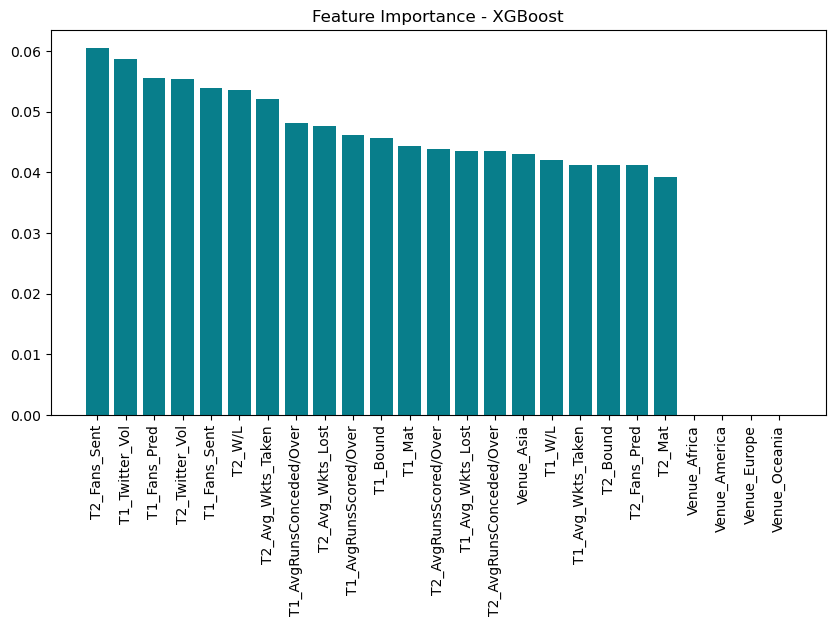

In [671]:
# get importance
importance = grid_search.best_estimator_.feature_importances_
#Important variables
importances_rf = pd.DataFrame(data = {'Attribute': encoded_xtrain.columns, 'Importance': grid_search.best_estimator_.feature_importances_})
importances_rf = importances_rf.sort_values(by='Importance', ascending = False)
#plot
plt.figure(figsize=(10,5))
plt.bar(x=importances_rf['Attribute'], height = importances_rf['Importance'], color = '#087E8B')
plt.title('Feature Importance - XGBoost')
plt.xticks(rotation='vertical')
plt.show()